<p style='text-align: right;'> Lúnes 5 de diciembre de 2022 </p> 
<p style='text-align: right;'> Malvicino, Maximiliano Raúl </p> 

# Transformada de Laplace inversa

Asignación de la asignatura Señales y Sistemas de la carrera Ingeniería de Sonido en Untref, a cargo de la profesora Trina Adrián Pérez.

Este trabajo tiene como objetivo calcular la transformada de Laplace inversa de una función dada de manera analítica y verificar el resultado utilizando el módulo SymPy de Python.

## Resolución en Python

Primero se importa el módulo SymPy. A continuación se define la función F(s) que se quiere antitransformar, haciendo uso del método symbols() para definir las variables de la transformada y su inversa.

In [1]:
from sympy import *

s = symbols('s')
t = symbols('t')

F = (s-2)/(s*(s+1)**3)

A partir del método inverse_laplace_transform() se calcula, se muestra en consola, y se grafica la transformación inversa.

f = (3*t**2 + 4*t - 4*exp(t) + 4)*exp(-t)*Heaviside(t)/2


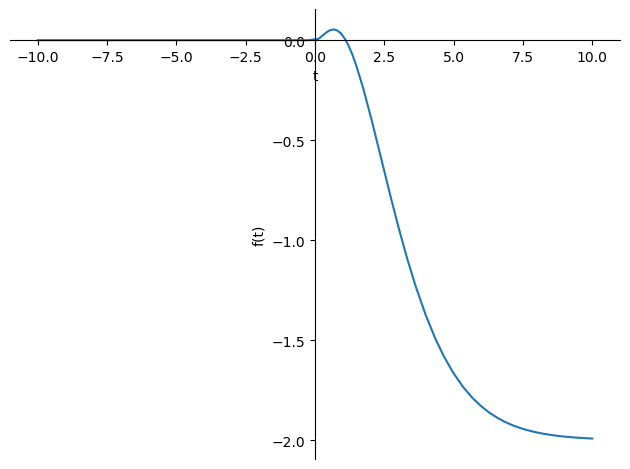

In [2]:
f = inverse_laplace_transform(F, s, t)
print(f'f = {f}')
plot(f)

## Resolución analítica

Sea s complejo. La función F(s) es un cociente de polinomios cuyo numerador se anula en s=2 y cuyodenominador se anula en s=0 o s=-1. Como F(s) es derivable en un entorno abierto de cualquier punto a excepción de s=0 y s=-1, se trata de una función analítica. F(s) tiene un cero en s=2 y dos singularidades aisladas en s=0 y s=-1 que resultan ser polos de orden 1 y 3 respectivamente. Por lo tanto, para s>0 se tiene que F(s) tiene desarrollo en series de Laurent y es integrable, pudiendo aplicar la transformación de Laplace.

Para esto, factorizamos F(s) por fracciones parciales haciendo uso del método apart() de SymPy.

In [3]:
print(f'F = {apart(F)}')

F = 2/(s + 1) + 2/(s + 1)**2 + 3/(s + 1)**3 - 2/s


Así, dado que la transformación de Laplace es lineal y biyectiva, podemos expresar:
\begin{equation*}
    \mathcal{L}^{-1} (F) =
    2 \, \mathcal{L}^{-1} \left( \frac{1}{s+1} \right)
    + 2 \, \mathcal{L}^{-1} \left[ \frac{1}{\left(s+1\right)^2} \right]
    + 3 \, \mathcal{L}^{-1} \left[ \frac{1}{\left(s+1\right)^3} \right]
    - 2 \, \mathcal{L}^{-1} \left( \frac{1}{s} \right)
\end{equation*}

Pudiendo aplicar a cada sumando la propiedad
\begin{equation*}
    \mathcal{L} \left[ t^n \, e^{at} \, u(t) \right] = \frac{n!}{\left(s-a\right)^{n+1}}
\end{equation*}
por tabla, para obtener
\begin{equation*}
    \mathcal{L}^{-1} (F) =
    2 \, e^{-t} \, u(t)
    + 2 \, t \, e^{-t} \, u(t)
    + \frac{3}{2!} \, t^2 \, e^{-t} \, u(t)
    - 2 \, u(t)
\end{equation*}

que es equivalente al resultado calculado por Python.